In [223]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [279]:
df=pd.read_csv('Sales.csv')

### Checking missing values

In [280]:
print(df[df==None].count())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


#### statistical description of feature columns 

In [281]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### correlation matrix of dataframe 
1. here our target variable is Sales which has higher positive correlation with TV add expenditure
2. Sales values has very low correlation with Radio and Newspaper expenditure
3. radio and NewsPaper has 0.354 correlation which states that it has moderate correlation 

<Axes: >

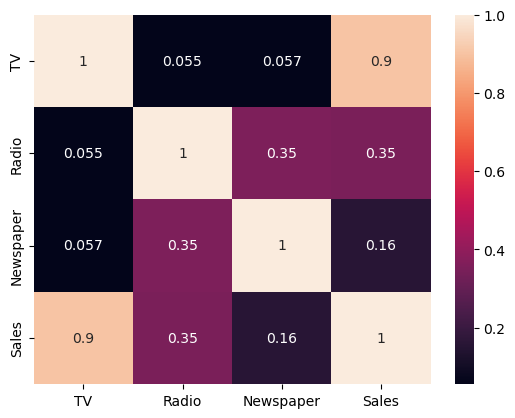

In [282]:
sbn.heatmap(df.corr(), annot=True)

### feature engineering on newpaper and radio data as it have a moderate correlation  0.35

In [283]:
df['mul_news_radio']=df['Newspaper']*df['Radio']
df['add_news_radio']=df['Newspaper']+df['Radio']

<Axes: >

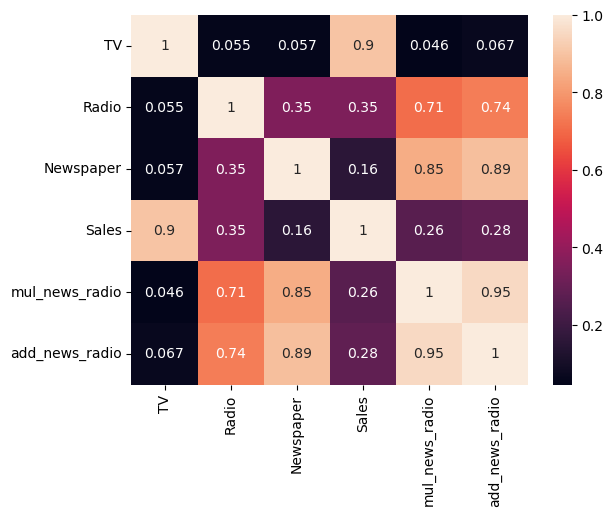

In [284]:
sbn.heatmap(df.corr(), annot=True)

### plotting histogram of distribution TV advertise expenditure

<Axes: >

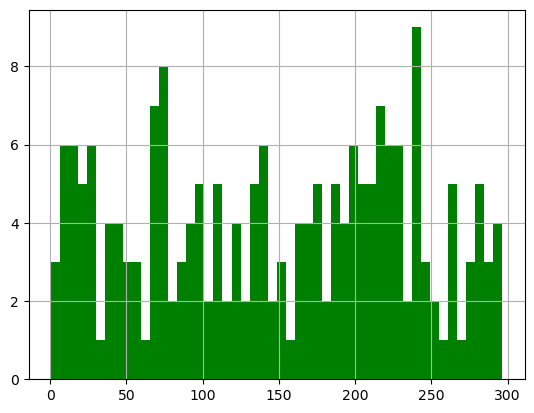

In [285]:
df['TV'].hist(bins=50,color='green')

### plotting histogram of distribution NewsPaper advertise expenditure

<Axes: >

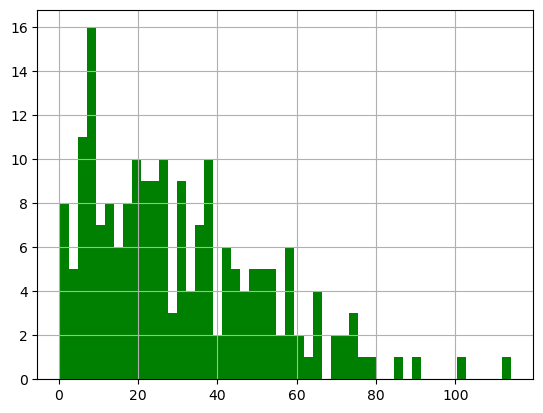

In [286]:
df['Newspaper'].hist(bins=50,color='green')

### plotting histogram of distribution Radio advertise expenditure

<Axes: >

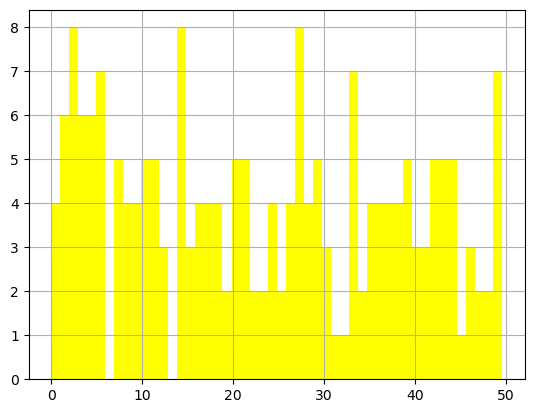

In [287]:
df['Radio'].hist(bins=50,color='yellow')

### plotting histogram of distribution Sales data

<Axes: >

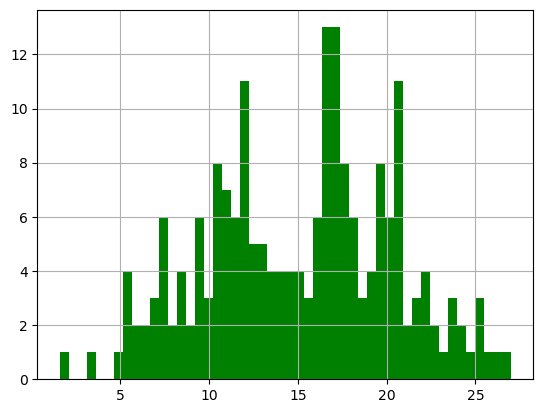

In [288]:
df['Sales'].hist(bins=50,color='green')

### 1 lets see the relationship between Sales column and advertise expenditure on TV

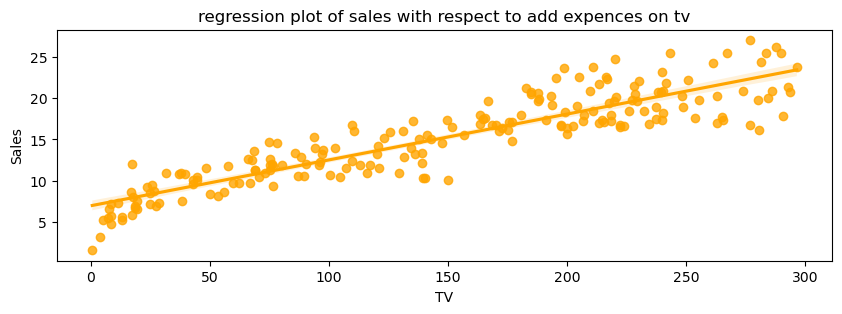

In [289]:
plt.figure(figsize=(10,3))
# sbn.lineplot(x=df['TV'],y=df['Sales'],label='sales value with respect to add expences on TV.corr value =0.9',color='green')
sbn.regplot(x=df['TV'],y=df['Sales'],color='orange')
plt.title('regression plot of sales with respect to add expences on tv')
plt.show()

### 2 lets see the relationship between  target feature Sales and add expenditure on NewsPaper

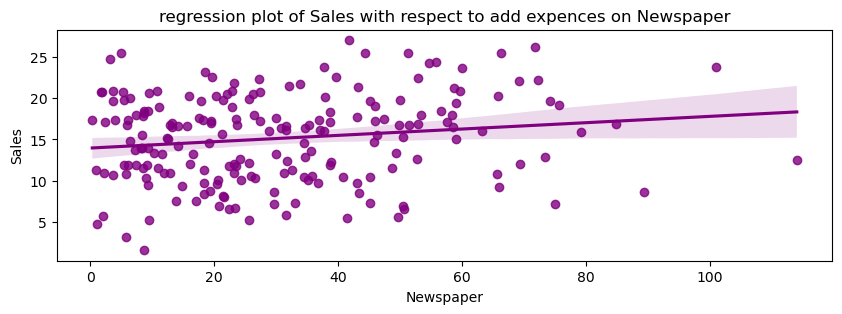

In [290]:
plt.figure(figsize=(10,3))
# sbn.lineplot(x=df['Newspaper'],y=df['Sales'],label='sales value with respect to add expences on TV',color='red')
sbn.regplot(x=df['Newspaper'],y=df['Sales'],color='purple')
plt.title('regression plot of Sales with respect to add expences on Newspaper')
plt.show()

### 3 lets see how target feature Sales is behaving with add expenditure on Radio

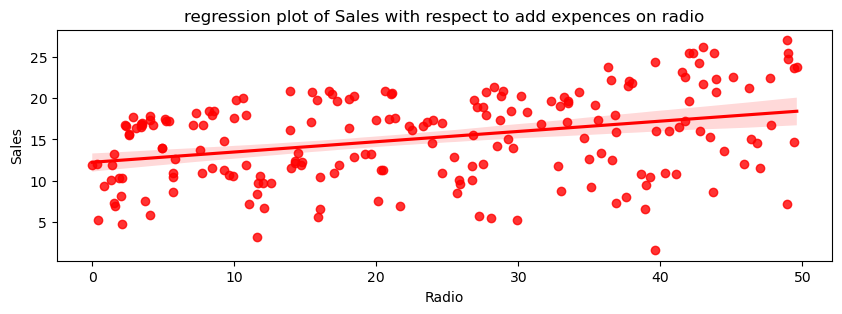

In [291]:
plt.figure(figsize=(10,3))
# sbn.lineplot(x=df['Radio'],y=df['Sales'],label='sales value with respect to add expences on TV',color='red')
sbn.regplot(x=df['Radio'],y=df['Sales'],color='red')
plt.title('regression plot of Sales with respect to add expences on radio')
plt.show()

#### since there is 0.354 correlation exist between Newspaper and Radio let see the relationship between them by plotting scatter plot

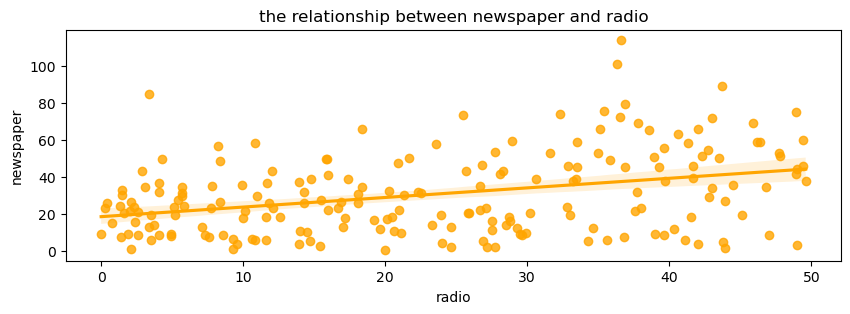

In [292]:
plt.figure(figsize=(10,3))
# sbn.scatterplot(x=df['Radio'],y=df['Newspaper'],label='sales value with respect to add expences on TV',color='blue')
sbn.regplot(x=df['Radio'],y=df['Newspaper'],color='orange')
plt.title('the relationship between newspaper and radio')
plt.xlabel('radio')
plt.ylabel('newspaper')

# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### lets multiply radio and newspaper expences to predict Sales with regplot

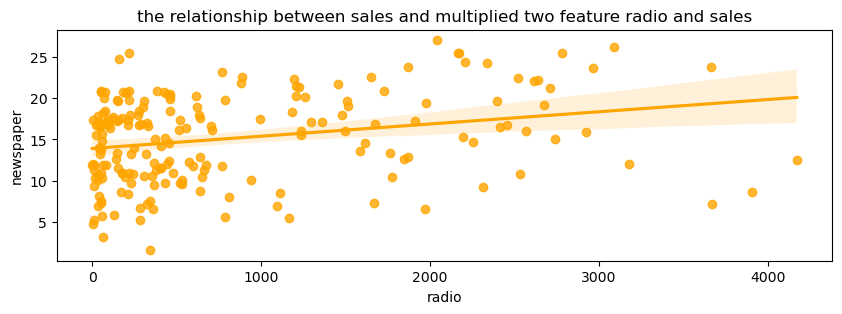

In [293]:
plt.figure(figsize=(10,3))
# sbn.scatterplot(x=df['Radio'],y=df['Newspaper'],label='sales value with respect to add expences on TV',color='blue')
sbn.regplot(x=df['mul_news_radio'].values,y=df['Sales'],color='orange')
plt.title('the relationship between sales and multiplied two feature radio and sales')
plt.xlabel('radio')
plt.ylabel('newspaper')

# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### lets add radio and newspaper expences to predict Sales with regplot

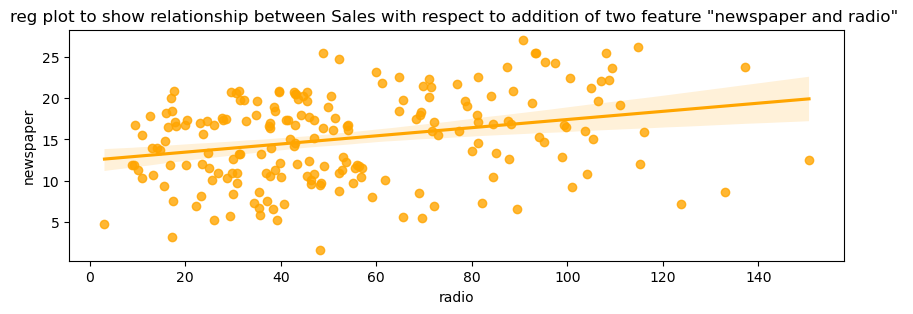

In [294]:
plt.figure(figsize=(10,3))
# sbn.scatterplot(x=df['Radio'],y=df['Newspaper'],label='sales value with respect to add expences on TV',color='blue')
sbn.regplot(x=df['add_news_radio'].values,y=df['Sales'],color='orange')
plt.title('reg plot to show relationship between Sales with respect to addition of two feature "newspaper and radio" ')
plt.xlabel('radio')
plt.ylabel('newspaper')

# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [295]:
featureVec,targetVec=df[['TV','Radio',"Newspaper","mul_news_radio","add_news_radio"]],df[['Sales']]

In [296]:
featureVec.head()

,TV,Radio,Newspaper,mul_news_radio,add_news_radio
0,230.1,37.8,69.2,2615.76,107.0
1,44.5,39.3,45.1,1772.43,84.4
2,17.2,45.9,69.3,3180.87,115.2
3,151.5,41.3,58.5,2416.05,99.8
4,180.8,10.8,58.4,630.72,69.2


In [297]:
targetVec.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


### train test split with 0.2% for test

In [298]:
X_train, X_test, y_train, y_test = train_test_split(featureVec, targetVec, test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 5), (40, 5), (160, 1), (40, 1))

### 1 linear regression model with only one feature TV which has highest correlation of 0.9

R2 score on test data 0.8089901615437864
Mean Absolute Error: 1.9506633598822343
Mean Squared Error: 5.499745084858266
Root Mean Squared Error: 2.3451535311911385
(160, 1) (40, 1)


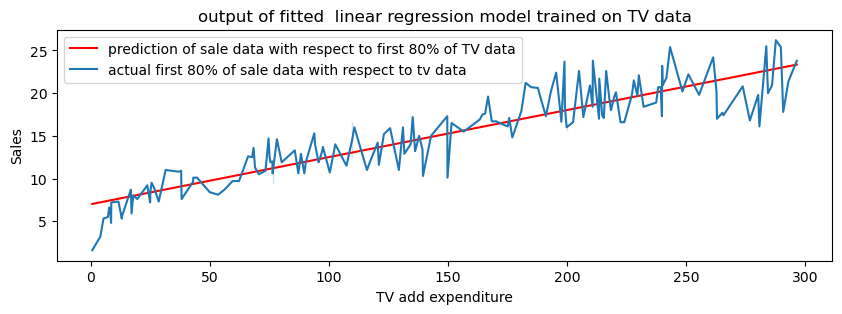

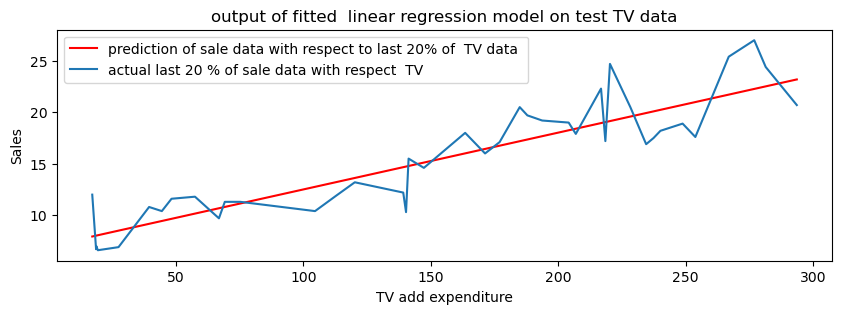

In [299]:
regr_tv=LinearRegression()
regr_tv.fit(X_train['TV'].values.reshape((-1,1)),y_train)
print("R2 score on test data", regr_tv.score(X_test['TV'].values.reshape((-1,1)),y_test))
pred_train=regr_tv.predict(X_train['TV'].values.reshape((-1,1)))
pred_test=regr_tv.predict(X_test['TV'].values.reshape((-1,1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))
print(pred_train.shape,pred_test.shape)
plt.figure(figsize=(10,3))
sbn.lineplot(x=X_train['TV'].values,y=pred_train.reshape((1,-1))[0],label='prediction of sale data with respect to first 80% of TV data',color='r')
sbn.lineplot(x=X_train['TV'].values,y=y_train['Sales'],label='actual first 80% of sale data with respect to tv data')

plt.title('output of fitted  linear regression model trained on TV data')
plt.xlabel('TV add expenditure')
plt.ylabel('Sales')
# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.figure(figsize=(10,3))
sbn.lineplot(x=X_test['TV'].values,y=pred_test.reshape((1,-1))[0],label='prediction of sale data with respect to last 20% of  TV data ',color='r')
sbn.lineplot(x=X_test['TV'].values,y=y_test['Sales'],label='actual last 20 % of sale data with respect  TV ')

plt.title('output of fitted  linear regression model on test TV data')
plt.xlabel('TV add expenditure')
plt.ylabel('Sales')
# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 2.prediction of Sale data on Radio add expenditure since correlation is 0.354

R2 score on test data 0.1581855798456231
Mean Absolute Error: 4.3737781356483
Mean Squared Error: 24.238357338164843
Root Mean Squared Error: 4.923246625770929
(160, 1) (40, 1)


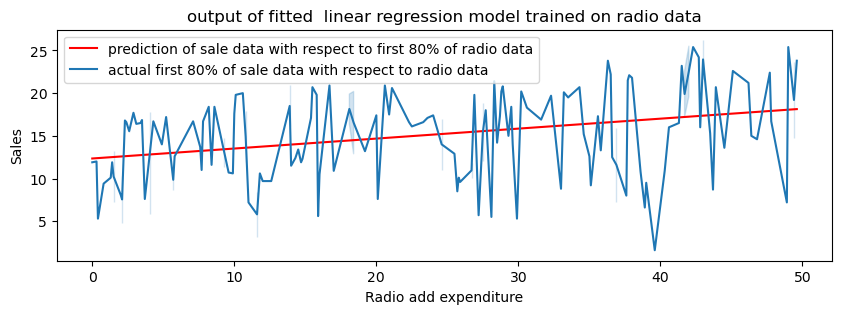

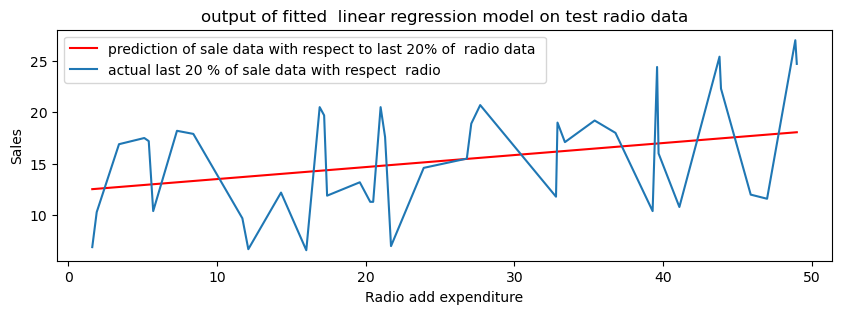

In [300]:
regr_tv=LinearRegression()
regr_tv.fit(X_train['Radio'].values.reshape((-1,1)),y_train)
print("R2 score on test data", regr_tv.score(X_test['Radio'].values.reshape((-1,1)),y_test))
pred_train=regr_tv.predict(X_train['Radio'].values.reshape((-1,1)))
pred_test=regr_tv.predict(X_test['Radio'].values.reshape((-1,1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))
print(pred_train.shape,pred_test.shape)
plt.figure(figsize=(10,3))
sbn.lineplot(x=X_train['Radio'].values,y=pred_train.reshape((1,-1))[0],label='prediction of sale data with respect to first 80% of radio data',color='r')
sbn.lineplot(x=X_train['Radio'].values,y=y_train['Sales'],label='actual first 80% of sale data with respect to radio data')

plt.title('output of fitted  linear regression model trained on radio data')
plt.xlabel('Radio add expenditure')
plt.ylabel('Sales')
# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.figure(figsize=(10,3))
sbn.lineplot(x=X_test['Radio'].values,y=pred_test.reshape((1,-1))[0],label='prediction of sale data with respect to last 20% of  radio data ',color='r')
sbn.lineplot(x=X_test['Radio'].values,y=y_test['Sales'],label='actual last 20 % of sale data with respect  radio ')

plt.title('output of fitted  linear regression model on test radio data')
plt.xlabel('Radio add expenditure')
plt.ylabel('Sales')
# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3. prediction of Sale data on newspaper since correlation 1.6 by making linear regression model

R2 score on test data -0.04846059842077355
Mean Absolute Error: 4.6185401988508605
Mean Squared Error: 30.188319457450586
Root Mean Squared Error: 5.4943898166630465
(160, 1) (40, 1)


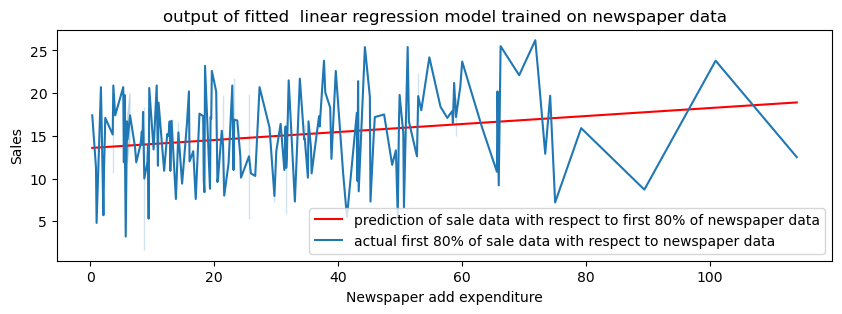

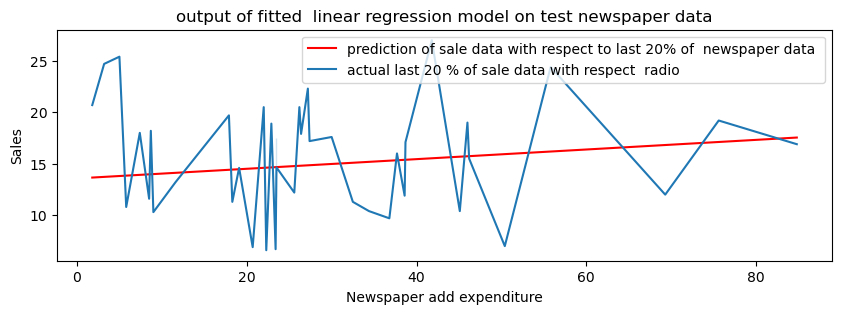

In [301]:
regr_tv=LinearRegression()
regr_tv.fit(X_train['Newspaper'].values.reshape((-1,1)),y_train)
print("R2 score on test data", regr_tv.score(X_test['Newspaper'].values.reshape((-1,1)),y_test))
pred_train=regr_tv.predict(X_train['Newspaper'].values.reshape((-1,1)))
pred_test=regr_tv.predict(X_test['Newspaper'].values.reshape((-1,1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))
print(pred_train.shape,pred_test.shape)
plt.figure(figsize=(10,3))
sbn.lineplot(x=X_train['Newspaper'].values,y=pred_train.reshape((1,-1))[0],label='prediction of sale data with respect to first 80% of newspaper data',color='r')
sbn.lineplot(x=X_train['Newspaper'].values,y=y_train['Sales'],label='actual first 80% of sale data with respect to newspaper data')

plt.title('output of fitted  linear regression model trained on newspaper data')
plt.xlabel('Newspaper add expenditure')
plt.ylabel('Sales')
# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.figure(figsize=(10,3))
sbn.lineplot(x=X_test['Newspaper'].values,y=pred_test.reshape((1,-1))[0],label='prediction of sale data with respect to last 20% of  newspaper data ',color='r')
sbn.lineplot(x=X_test['Newspaper'].values,y=y_test['Sales'],label='actual last 20 % of sale data with respect  radio ')

plt.title('output of fitted  linear regression model on test newspaper data')
plt.xlabel('Newspaper add expenditure')
plt.ylabel('Sales')
# Adjust the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 4. prediction of Sale data using using TV and Radio data 

In [309]:
regr_tv=LinearRegression()
regr_tv.fit(X_train[['TV','Radio']].values,y_train['Sales'])
print("R2 score on test data", regr_tv.score(X_test[['TV','Radio']].values,y_test))
pred_train=regr_tv.predict(X_train[['TV','Radio']].values)
pred_test=regr_tv.predict(X_test[['TV','Radio']].values)
print(pred_train.shape,pred_test.shape)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))

R2 score on test data 0.9231953758463829
(160,) (40,)
Mean Absolute Error: 1.139238124977884
Mean Squared Error: 2.2114350632261948
Root Mean Squared Error: 1.4870894603977916


### 5. prediction of Sale data using using TV and Radio data and Newspaper 

In [303]:
regr_tv=LinearRegression()
regr_tv.fit(X_train[['TV','Radio','Newspaper']].values,y_train['Sales'])
print("R2 score on test data", regr_tv.score(X_test[['TV','Radio','Newspaper']].values,y_test))
pred_train=regr_tv.predict(X_train[['TV','Radio','Newspaper']].values)
pred_test=regr_tv.predict(X_test[['TV','Radio','Newspaper']].values)
print(pred_train.shape,pred_test.shape)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))

R2 score on test data 0.9222863294430457
(160,) (40,)
Mean Absolute Error: 1.1411230464948994
Mean Squared Error: 2.237609230635945
Root Mean Squared Error: 1.495864041494395


### 6.prediction of sale data using TV and mul_news_radio data by making linear model

In [304]:
regr_tv=LinearRegression()
regr_tv.fit(X_train[['TV','add_news_radio']].values,y_train['Sales'])
print("R2 score on test data", regr_tv.score(X_test[['TV','add_news_radio']].values,y_test))
pred_train=regr_tv.predict(X_train[['TV','add_news_radio']].values)
pred_test=regr_tv.predict(X_test[['TV','add_news_radio']].values)
print(pred_train.shape,pred_test.shape)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))

R2 score on test data 0.8492608793089257
(160,) (40,)
Mean Absolute Error: 1.6173481709007482
Mean Squared Error: 4.340230559938597
Root Mean Squared Error: 2.083322001021109


### 7.prediction of sale data using TV column and mul_news_radio by making a linear model

In [305]:
regr_tv=LinearRegression()
regr_tv.fit(X_train[['TV','mul_news_radio']].values,y_train['Sales'])
print("R2 score on test data", regr_tv.score(X_test[['TV','mul_news_radio']].values,y_test))
pred_train=regr_tv.predict(X_train[['TV','mul_news_radio']].values)
pred_test=regr_tv.predict(X_test[['TV','mul_news_radio']].values)
print(pred_train.shape,pred_test.shape)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))

R2 score on test data 0.842818328638143
(160,) (40,)
Mean Absolute Error: 1.6209545791968818
Mean Squared Error: 4.525730881136503
Root Mean Squared Error: 2.1273765254736885


### 8.implementing ridge regression on all the features of the df to predict sale

In [306]:
ridge_Model=Ridge(alpha=1.0)
ridge_Model.fit(X_train[['TV','Radio','Newspaper','add_news_radio','mul_news_radio']].values,y_train['Sales'])
print("R2 score on test data", ridge_Model.score(X_test[['TV','Radio','Newspaper','add_news_radio','mul_news_radio']].values,y_test))
pred_train=ridge_Model.predict(X_train[['TV','Radio','Newspaper','add_news_radio','mul_news_radio']].values)
pred_test=ridge_Model.predict(X_test[['TV','Radio','Newspaper','add_news_radio','mul_news_radio']].values)
print(pred_train.shape,pred_test.shape)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))

R2 score on test data 0.9209539424671168
(160,) (40,)
Mean Absolute Error: 1.1190033330726818
Mean Squared Error: 2.2759726405064455
Root Mean Squared Error: 1.5086327056332982


### 9.implementing ploynomial regression on feature column TV and radio since it has a good correlation with Sale 

In [307]:
poly=PolynomialFeatures(1)
train=poly.fit_transform(X_train[['TV','Radio','Newspaper']].values)
test=poly.transform(X_test[['TV','Radio','Newspaper']].values)
print(train.shape,test.shape)
regr_tv=LinearRegression()
regr_tv.fit(train,y_train['Sales'])
print("R2 score on test data", regr_tv.score(test,y_test))
pred_train=regr_tv.predict(train)
pred_test=regr_tv.predict(test)
print(pred_train.shape,pred_test.shape)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test, squared=False))

(160, 4) (40, 4)
R2 score on test data 0.9222863294430457
(160,) (40,)
Mean Absolute Error: 1.141123046494899
Mean Squared Error: 2.237609230635945
Root Mean Squared Error: 1.495864041494395


### inference 
1. by taking all possible combination of features and analyzing their r2 score value, mean squared, mean abosolute error and root mean squared err, TV and Radio data are giving better result for linear regression model
2. R2 score on test data 0.9231953758463829
3. Mean Absolute Error: 1.139238124977884
4. Mean Squared Error: 2.2114350632261948
5. Root Mean Squared Error: 1.4870894603977916

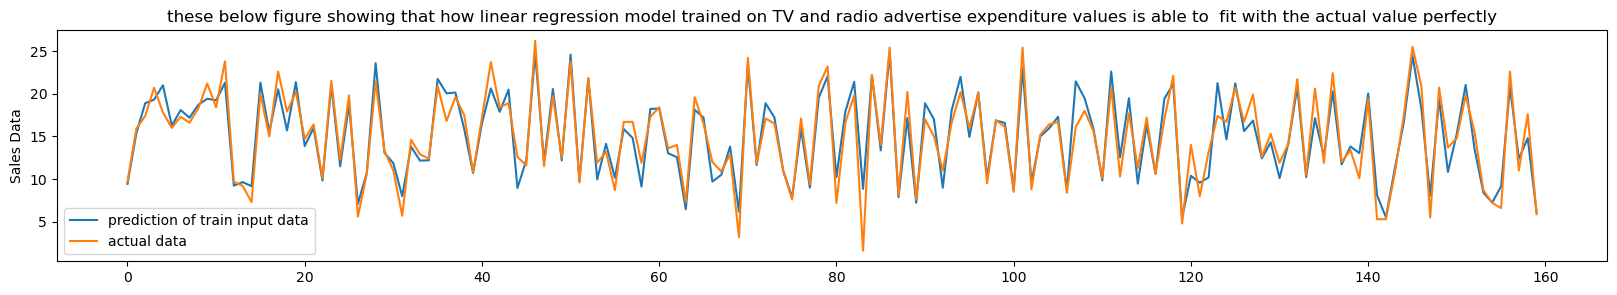

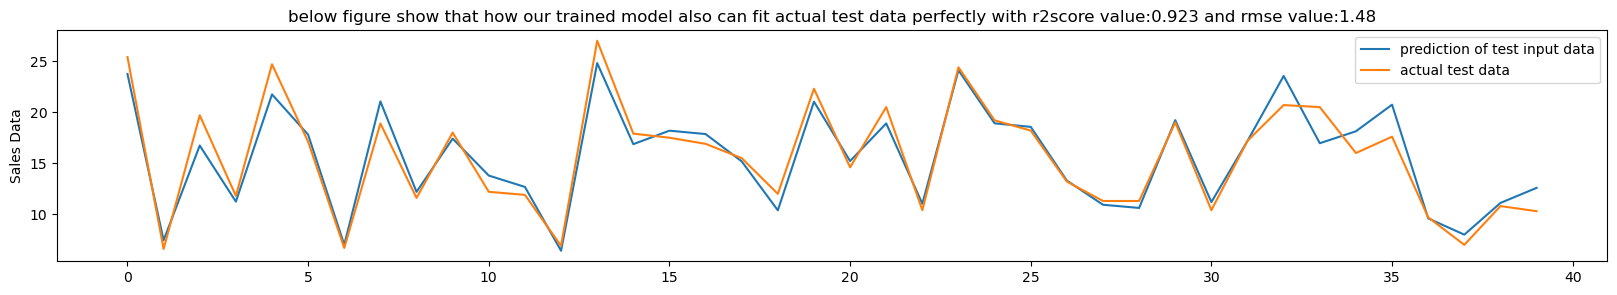

In [313]:
plt.figure(figsize=(20,3))

sbn.lineplot(pred_train,label='prediction of train input data')
sbn.lineplot(y_train['Sales'].values,label='actual data')
plt.title('these below figure showing that how linear regression model trained on TV and radio advertise expenditure values is able to  fit with the actual value perfectly')
plt.ylabel('Sales Data')
plt.show()
plt.figure(figsize=(20,3))
sbn.lineplot(pred_test,label='prediction of test input data')
sbn.lineplot(y_test['Sales'].values,label='actual test data')
plt.title('below figure show that how our trained model also can fit actual test data perfectly with r2score value:0.923 and rmse value:1.48')
plt.ylabel('Sales Data')

plt.show()